In [1]:
# Imports
import pandas as pd
import csv
import pyarrow.feather as feather
# import dask.dataframe as dd
import polars as pl
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import ptitprince as pt
# from jupyter_datatables import init_datatabless_mode

In [2]:
# Load the CSV file with Polars
df = pl.read_csv('D:\\datasets\\github_credit_risk_modeling_data\\credit_risk_data.csv')

In [3]:
print(f"Loaded dataset has {len(df):,.0f} rows.")

Loaded dataset has 20,000,000 rows.


In [4]:
# Convert to pandas for EDA
df = df.to_pandas()

In [6]:
print(f"pandas-from-polars dataset has {len(df):,.0f} rows.")

pandas-from-polars dataset has 20,000,000 rows.


In [7]:
# Store so you don't have to do this all over again
%store df

Stored 'df' (DataFrame)


C:\Users\blake\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\extensions\storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/df requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [ ]:
# In a new Jupyter Notebook session
# %store -r df

In [9]:
df.head(3)

,customer_id,age,gender,marital_status,dependents,employment_status,annual_income,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,credit_score,debt_to_income_ratio,delinquencies,credit_history_length,default,default_amount,repayment_tenure
0,1003,22,Female,Single,5,Retired,616762,382056,7,18.46,Business,0.78,355,0.36,6,3,1,876106,136
1,1005,75,Other,Divorced,8,Unemployed,580543,65882,25,10.36,Home,1.40,704,0.03,7,22,1,986470,174
2,1018,76,Male,Married,3,Self-employed,244871,552015,27,9.85,Business,0.64,596,0.43,5,3,0,630100,23


In [8]:
df['avg_loan_year_amount'] = df['loan_amount'] / df['loan_term']

In [9]:
df['avg_loan_monthly_amount'] = df['avg_loan_year_amount'] / 12

In [10]:
df.head(2)

,customer_id,age,gender,marital_status,dependents,employment_status,annual_income,loan_amount,loan_term,interest_rate,...,loan_to_value_ratio,credit_score,debt_to_income_ratio,delinquencies,credit_history_length,default,default_amount,repayment_tenure,avg_loan_year_amount,avg_loan_monthly_amount
0,1003,22,Female,Single,5,Retired,616762,382056,7,18.46,...,0.78,355,0.36,6,3,1,876106,136,54579.428571,4548.285714
1,1005,75,Other,Divorced,8,Unemployed,580543,65882,25,10.36,...,1.40,704,0.03,7,22,1,986470,174,2635.280000,219.606667


In [11]:
df.describe()

,customer_id,age,dependents,annual_income,loan_amount,loan_term,interest_rate,loan_to_value_ratio,credit_score,debt_to_income_ratio,delinquencies,credit_history_length,default,default_amount,repayment_tenure,avg_loan_year_amount,avg_loan_monthly_amount
count,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07
mean,9.912915e+07,5.099857e+01,4.000049e+00,5.099101e+05,5.025159e+05,1.499811e+01,1.125007e+01,9.999363e-01,5.744912e+02,2.549742e-01,4.499531e+00,1.949975e+01,4.998972e-01,4.999819e+05,1.799909e+02,6.865243e+04,5.721036e+03
std,5.722441e+07,1.933561e+01,2.582183e+00,2.829190e+05,2.872541e+05,8.365939e+00,5.051350e+00,2.887113e-01,1.587574e+02,1.415094e-01,2.872448e+00,1.154465e+01,5.000000e-01,2.887186e+05,1.036447e+02,1.179145e+05,9.826212e+03
min,1.003000e+03,1.800000e+01,0.000000e+00,2.000000e+04,5.000000e+03,1.000000e+00,2.500000e+00,5.000000e-01,3.000000e+02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.724138e+02,1.436782e+01
25%,4.957286e+07,3.400000e+01,2.000000e+00,2.649160e+05,2.537250e+05,8.000000e+00,6.880000e+00,7.500000e-01,4.370000e+02,1.300000e-01,2.000000e+00,9.000000e+00,0.000000e+00,2.498818e+05,9.000000e+01,1.691886e+04,1.409905e+03
50%,9.914055e+07,5.100000e+01,4.000000e+00,5.097840e+05,5.025530e+05,1.500000e+01,1.125000e+01,1.000000e+00,5.740000e+02,2.600000e-01,5.000000e+00,1.900000e+01,0.000000e+00,4.999500e+05,1.800000e+02,3.350936e+04,2.792447e+03
75%,1.486807e+08,6.800000e+01,6.000000e+00,7.549260e+05,7.513120e+05,2.200000e+01,1.562000e+01,1.250000e+00,7.120000e+02,3.800000e-01,7.000000e+00,2.900000e+01,1.000000e+00,7.500880e+05,2.700000e+02,6.488755e+04,5.407296e+03
max,1.982349e+08,8.400000e+01,8.000000e+00,9.999990e+05,9.999990e+05,2.900000e+01,2.000000e+01,1.500000e+00,8.490000e+02,5.000000e-01,9.000000e+00,3.900000e+01,1.000000e+00,9.999990e+05,3.590000e+02,9.999950e+05,8.333292e+04


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   customer_id              int64  
 1   age                      int64  
 2   gender                   object 
 3   marital_status           object 
 4   dependents               int64  
 5   employment_status        object 
 6   annual_income            int64  
 7   loan_amount              int64  
 8   loan_term                int64  
 9   interest_rate            float64
 10  loan_purpose             object 
 11  loan_to_value_ratio      float64
 12  credit_score             int64  
 13  debt_to_income_ratio     float64
 14  delinquencies            int64  
 15  credit_history_length    int64  
 16  default                  int64  
 17  default_amount           int64  
 18  repayment_tenure         int64  
 19  avg_loan_year_amount     float64
 20  avg_loan_monthly_amount  float64
dtypes: flo

In [13]:
# Summary of categorical columns
df.describe(include=['object', 'category'])

,gender,marital_status,employment_status,loan_purpose
count,20000000,20000000,20000000,20000000
unique,3,4,4,5
top,Female,Widowed,Self-employed,Car
freq,6668851,5001978,5002215,4002633


In [14]:
# Check for missing values
df.isnull().sum()

customer_id                0
age                        0
gender                     0
marital_status             0
dependents                 0
employment_status          0
annual_income              0
loan_amount                0
loan_term                  0
interest_rate              0
loan_purpose               0
loan_to_value_ratio        0
credit_score               0
debt_to_income_ratio       0
delinquencies              0
credit_history_length      0
default                    0
default_amount             0
repayment_tenure           0
avg_loan_year_amount       0
avg_loan_monthly_amount    0
dtype: int64

In [ ]:
# Plot histograms for numerical features
df_pandas.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show();

In [ ]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_pandas)
plt.xticks(rotation=90)
plt.show()

In [15]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Female'

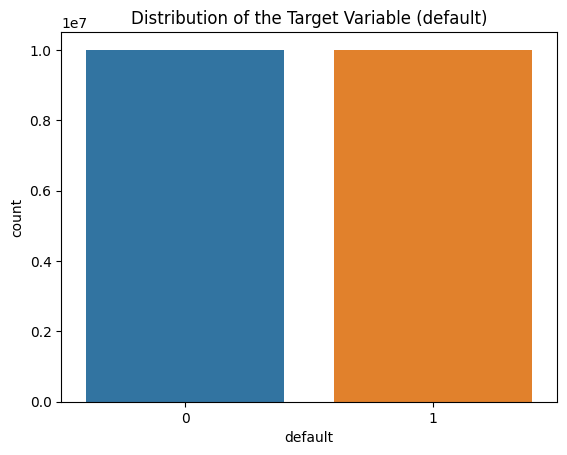

In [16]:
# Distribution of the target variable
sns.countplot(x='default', data=df)
plt.title('Distribution of the Target Variable (default)')
plt.show()

In [ ]:
# Box plots to understand the relationship between features and the target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_pandas.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(len(df_pandas.select_dtypes(include=['float64', 'int64']).columns) // 2 + 1, 2, i + 1)
    sns.boxplot(x='default', y=col, data=df_pandas)
    plt.title(f'{col} vs Default')
plt.tight_layout()
plt.show()

In [18]:
df['age'].mean()

50.99857385

In [20]:
# Calculate the interquartile range (IQR)
q25, q75 = np.percentile(df['age'], [25, 75])
iqr = q75 - q25

In [21]:
print(iqr, q25, q75)

34.0 34.0 68.0


In [22]:
# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr * len(df['age']) ** (-1/3)

In [23]:
# Calculate the number of bins
num_bins = int(np.ceil((df['age'].max() - df['age'].min()) / bin_width))

print(f"Optimal number of bins according to the Freedman-Diaconis rule: {num_bins}")

Optimal number of bins according to the Freedman-Diaconis rule: 264


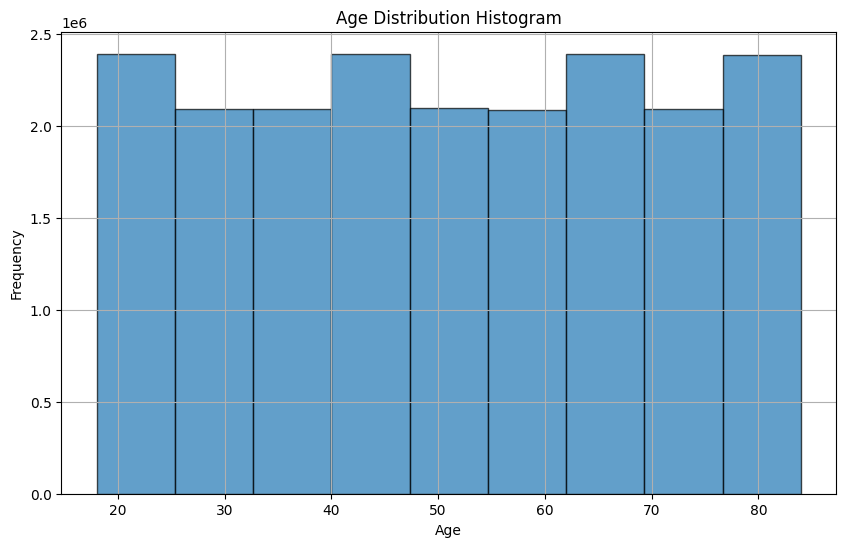

In [28]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=9, edgecolor='black', alpha=0.7)
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Group by default status and calculate means
grouped = df.groupby('default').mean()

# Plot the relationship of numerical features with the target
grouped.T.plot(kind='bar', figsize=(15, 10))
plt.title('Mean Values of Features Grouped by Default Status')
plt.xticks(rotation=90)
plt.show()